In [1]:
#| default_exp fastai_utils

In [5]:
#| export
from nbs.core import imread, imshow, imwrite
from fastai.vision.all import *

In [6]:
#| export
class ExamplePredictor:
    path = '/app/' # because save/load appends ./models/ to this
    def __init__(self):
        pass
    
    def load_learner(self, model_name, path_to_images='/app/data/example_pets/'):
        self.learn = ExamplePredictor.init_learner(path_to_images, valid_pct=0)
        self.learn.load(model_name)
    
    def predict(self, np_img):
        img = PILImage.create(np_img)
        is_cat,_,probs = self.learn.predict(img)
        classes = self.learn.dls.vocab
        return [{'name': c, 'score': float(p)} for c,p in zip(classes, probs)]
    
    def init_learner(path='/app/data/example_pets/', pretrained=False, valid_pct=0.2):

        def label_func(x):
            return '_'.join(x.split('_')[:-1])
        dls = ImageDataLoaders.from_name_func(
            ExamplePredictor.path, get_image_files(path), valid_pct=valid_pct, seed=42, 
            label_func=label_func, item_tfms=Resize(224), num_workers=0)

        return vision_learner(dls, resnet18, metrics=error_rate, pretrained=pretrained)

In [3]:
#| notest
path = untar_data(URLs.PETS)/'images'
learn = ExamplePredictor.init_learner(path, pretrained=True)

/opt/conda/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [100]:
#| notest
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.562026,0.437359,0.141407,06:52


epoch,train_loss,valid_loss,error_rate,time
0,0.498015,0.313939,0.100812,11:29


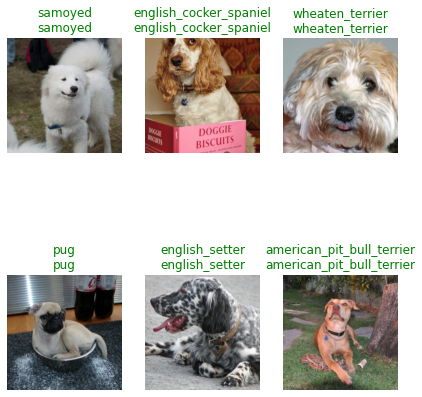

In [112]:
#| notest
learn.show_results(max_n=6, figsize=(7,8))

In [113]:
#| notest
learn.save('example_pets', with_opt=False)

#### Tests

In [7]:
from nbs.test_utils import test_eq, test_fail, test_close, test_one_notebook, test_all_notebooks, Test

In [9]:
with Test('should predict the correct label'):
    predictor = ExamplePredictor()
    predictor.load_learner('example_pets')
    with Test('Egyption Mau'):
        img = imread('/app/data/example_pets/Egyptian_Mau_1.jpg')
        preds = predictor.predict(img)
        el = next(filter(lambda x: x['name'] == 'Egyptian_Mau', preds))
        test_close(el['score'], 1.0, eps=0.4)
    with Test('samoyed'):
        img = imread('/app/data/example_pets/samoyed_1.jpg')
        preds = predictor.predict(img)
        el = next(filter(lambda x: x['name'] == 'samoyed', preds))
        test_close(el['score'], 1.0, eps=0.4)

In [11]:
#| notest
from nbs.test_utils import test_one_notebook
test_one_notebook('05_fastai_utils.ipynb')

Starting 05_fastai_utils.ipynb
- Completed 05_fastai_utils.ipynb
success: True duration: 0.9802396297454834


In [12]:
#| notest
from nbs.test_utils import test_all_notebooks
test_all_notebooks(do_print=True)

Starting /app/src/index.ipynb
- Completed /app/src/index.ipynb
Starting /app/src/03_test_utils.ipynb
- Completed /app/src/03_test_utils.ipynb
Starting /app/src/01_import_test.ipynb
- Completed /app/src/01_import_test.ipynb
Starting /app/src/04_server_functions.ipynb
- Completed /app/src/04_server_functions.ipynb
Starting /app/src/00_core.ipynb
- Completed /app/src/00_core.ipynb
Starting /app/src/02_gpu_tests.ipynb
- Completed /app/src/02_gpu_tests.ipynb
Starting /app/src/05_fastai_utils.ipynb
- Completed /app/src/05_fastai_utils.ipynb
Success.


In [6]:
!nbdev_export